In [8]:
from utils import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Exploration of the data

## Checks
First, we want to check if the nodes are not duplicated for each transport.

In [3]:
df_network_combined = pd.read_csv('data/adelaide/network_combined.csv', sep=';')
df_network_combined.head()

,from_stop_I,to_stop_I,d,duration_avg,n_vehicles,route_I_counts,route_type
0,1,2,616,60.000000,36,474:36,2
1,2,3,1456,203.333333,36,474:36,2
2,3,8,9522,540.000000,3,474:3,2
3,3,4,1506,176.666667,36,"473:4,474:32",2
4,3,5,2557,240.000000,21,473:21,2


In [4]:
df_network_nodes = pd.read_csv('data/adelaide/network_nodes_labeled.csv')
df_network_nodes.head()

,stop_I,lat,lon,name,city_center
0,1,-34.594537,138.747886,Gawler Central Railway Station,0
1,2,-34.595140,138.741200,Gawler Oval Railway Station,0
2,3,-34.608171,138.739819,Gawler Railway Station,0
3,4,-34.620412,138.732799,Evanston Railway Station,0
4,5,-34.628232,138.726211,Tambelin Railway Station,0


In [5]:
df_network_nodes['stop_I'].is_unique

True

In [6]:
# Gather all the data about the nodes
df_nodes = gather_all_data('data')
df_nodes.head()

,stop_I,lat,lon,name,city_center,city
0,1,-34.594537,138.747886,Gawler Central Railway Station,0,adelaide
1,2,-34.595140,138.741200,Gawler Oval Railway Station,0,adelaide
2,3,-34.608171,138.739819,Gawler Railway Station,0,adelaide
3,4,-34.620412,138.732799,Evanston Railway Station,0,adelaide
4,5,-34.628232,138.726211,Tambelin Railway Station,0,adelaide


## Size of each city and the distribution of labels

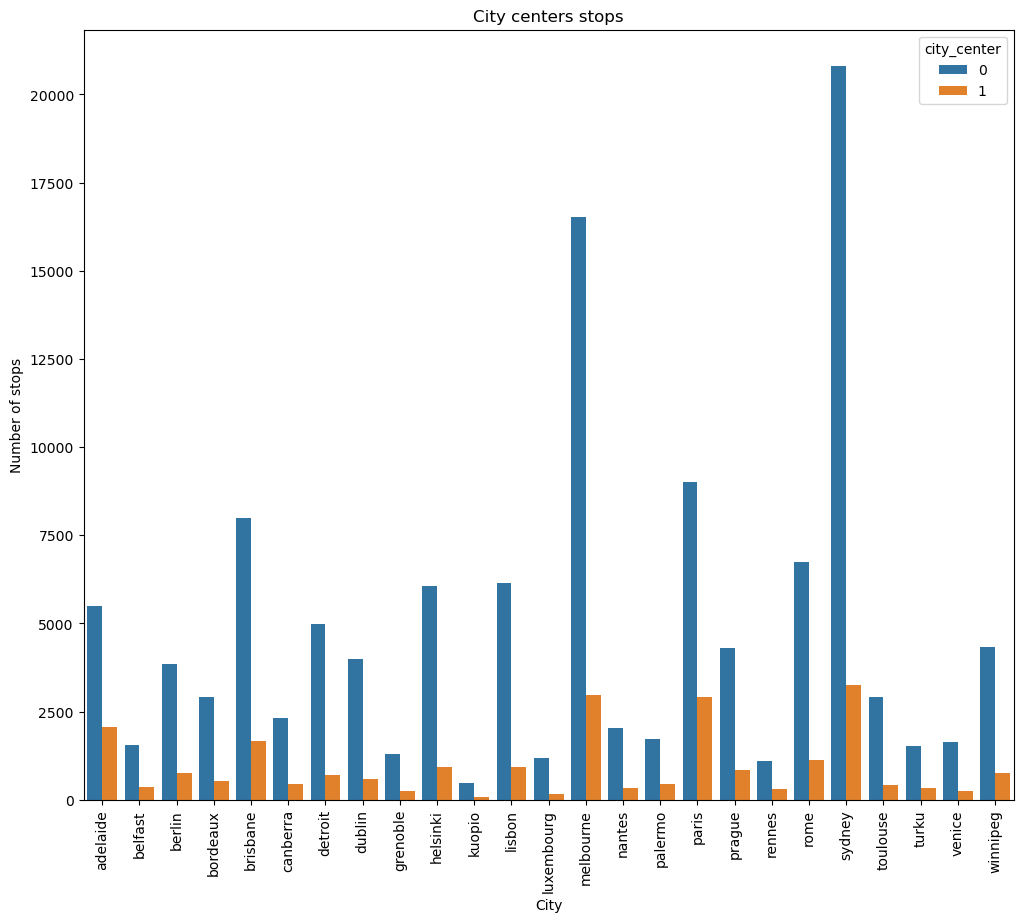

In [36]:
sns.countplot(df_nodes, x='city', hue='city_center')
plt.title('City centers stops')
plt.ylabel('Number of stops')
plt.xlabel('City')
plt.xticks(rotation=90)
plt.show()

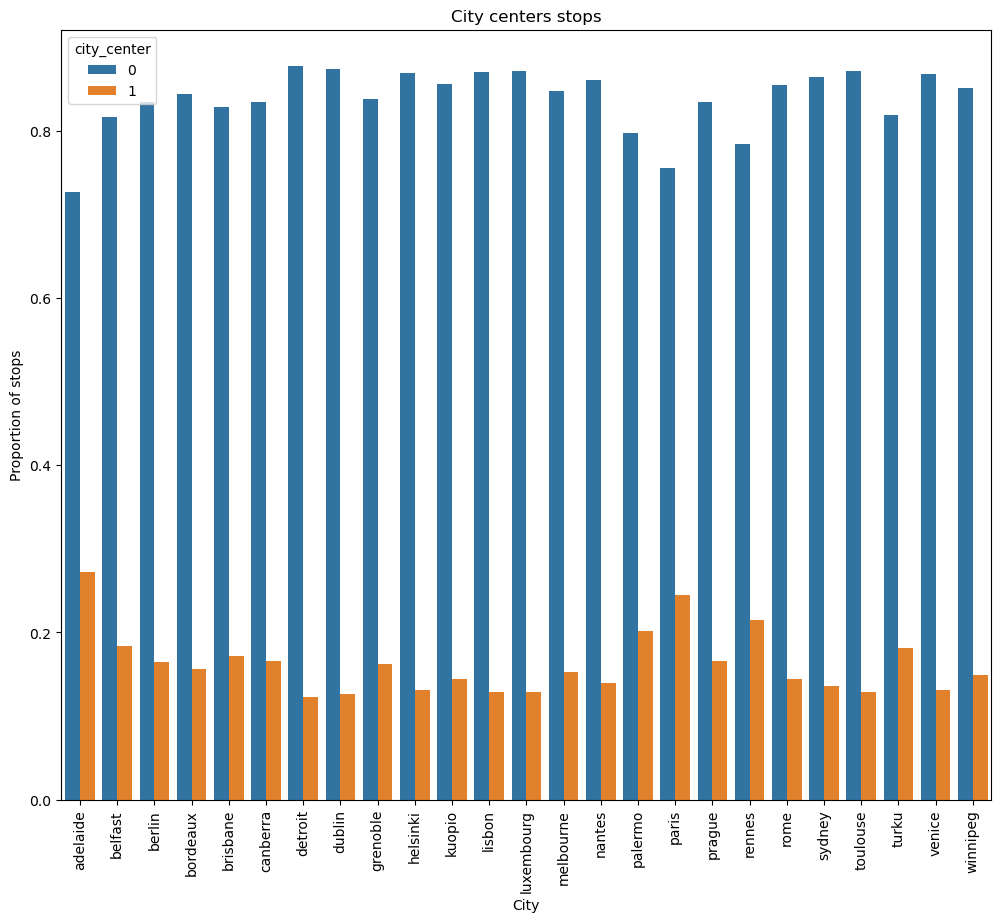

In [35]:
df_nodes_normalized = df_nodes.groupby('city')[['city', 'city_center']].value_counts(normalize=True).rename('proba').reset_index()
df_nodes_normalized.head()

sns.barplot(df_nodes_normalized, x='city', y='proba', hue='city_center')
plt.title('City centers stops')
plt.ylabel('Proportion of stops')
plt.xlabel('City')
plt.xticks(rotation=90)
plt.show()

## Types of transports

Here we are interested in the types of transport each city has, their distribution and how they behave compared to the city centers labels.

In [38]:
df_nodes

,stop_I,lat,lon,name,city_center,city
0,1,-34.594537,138.747886,Gawler Central Railway Station,0,adelaide
1,2,-34.595140,138.741200,Gawler Oval Railway Station,0,adelaide
2,3,-34.608171,138.739819,Gawler Railway Station,0,adelaide
3,4,-34.620412,138.732799,Evanston Railway Station,0,adelaide
4,5,-34.628232,138.726211,Tambelin Railway Station,0,adelaide
...,...,...,...,...,...,...
5074,5082,49.829086,-97.095486,Southbound Ashworth at Greenwood,0,winnipeg
5075,5083,49.810051,-97.089394,Westbound John Forsyth at Baisinger,0,winnipeg
5076,5084,49.810279,-97.086355,Eastbound John Forsyth at Everden,0,winnipeg
5077,5085,49.810443,-97.086474,Westbound John Forsyth at Everden,0,winnipeg


In [40]:
df_links = gather_all_data('data', nodes=False)
df_links.head()

,from_stop_I,to_stop_I,d,duration_avg,n_vehicles,route_I_counts,route_type,city
0,1,2,616,60.000000,36,474:36,2,adelaide
1,2,3,1456,203.333333,36,474:36,2,adelaide
2,3,8,9522,540.000000,3,474:3,2,adelaide
3,3,4,1506,176.666667,36,"473:4,474:32",2,adelaide
4,3,5,2557,240.000000,21,473:21,2,adelaide
